<a href="https://colab.research.google.com/github/vaibhavmande131198/Supervised-learning-classification/blob/main/Capstone_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Airline Passenger Referral Prediction**



Project Type : - Classification

Contribution : - Individual

# **Project Summary -**

This project aims to predict whether passengers will recommend an airline to their friends using airline review data collected from 2006 to 2019. The dataset includes both multiple-choice and free-text responses. To achieve this, we will perform extensive exploratory data analysis (EDA) to understand patterns and trends in the data. We will then implement various classification algorithms, including Logistic Regression, Decision Trees, Naive Bayes, Support Vector Machines (SVM), and Random Forests. The performance of these models will be evaluated to determine the most effective method for predicting passenger recommendations. The goal is to provide insights that airlines can use to improve customer satisfaction and referral rates.

# **GitHub Link -**

https://github.com/vaibhavmande131198/Supervised-learning-classification

# **Problem Statement**


**Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning algorithms and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For statistical models and tests
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter data science/Machine learning /ML Projects/Supervised Learning : Classification/data_airline_reviews.xlsx - capstone_airline_reviews3.csv')
airline_df = dataset.copy()

### Dataset First View

In [4]:
# Dataset First Look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
airline_df.shape

(131895, 17)

In [7]:
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

### Dataset Information

In [8]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
duplicate_values  = airline_df.duplicated().sum()
print("Number of duplicate values:", duplicate_values)

Number of duplicate values: 70711


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
missing_values = airline_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64


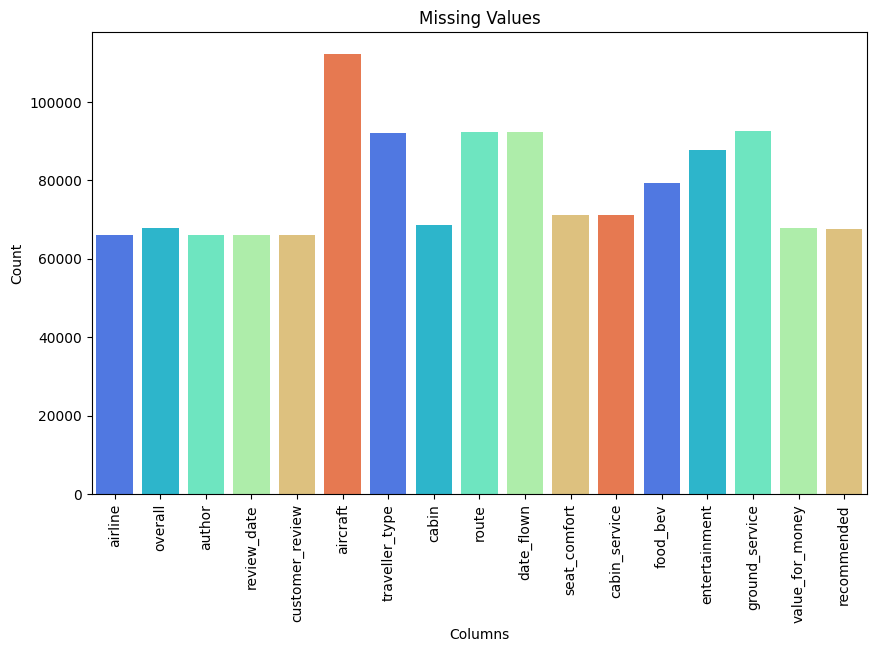

In [11]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=airline_df.columns, y=airline_df.isnull().sum(), palette=sns.color_palette('rainbow'))
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### What did you know about your dataset?

Answer : Given dataset have 131895 rows and 17 columns. There are 70711 duplicates values and also there are missing values in the dataset.

## ***Understanding Your Variables***

In [12]:
# Dataset Columns
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [13]:
# Dataset Describe
airline_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description

* **airline** : Name of the airline.
* **overall** : Overall points are given to the trip between 1 to 10.
* **aothir** : Author of the trip.
* **reviewdate** : date of the review customer.
* **aircraft** : type of the aircraft.
* **travellertype** : Type of the traveler(e.g business, leisure).
* **Flight date** : Cabin at the flight date flown.
* **cabin service** : Rated between 1-5.
* **foodbev** : Rated between 1-5.
* **entertainment** : Rated between 1-5.
* **groundservice** : Rated between 1-5.
* **valueformoney** : Rated between 1-5
* **recommended** : Binary, target variable.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
airline_df.nunique()

,0
airline,81
overall,10
author,44069
review_date,3015
customer_review,61172
aircraft,2088
traveller_type,4
cabin,4
route,24549
date_flown,63


## ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
duplicate_values  = airline_df.duplicated().sum()
print("Number of duplicate values:", duplicate_values)

Number of duplicate values: 70711


In [16]:
# drop duplicate
airline_df.drop_duplicates(inplace=True)

In [17]:
duplicate_values  = airline_df.duplicated().sum()
print("Number of duplicate values:", duplicate_values)

Number of duplicate values: 0


In [18]:
# checking missing values
airline_df.isnull().sum()

,0
airline,1
overall,1783
author,1
review_date,1
customer_review,1
aircraft,42696
traveller_type,23644
cabin,2479
route,23671
date_flown,23750


### What all manipulations have you done and insights you found?

Answer : Here I droped duplicate values from the dataset after that I checked missing value.

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Top 10 airlines which have higher ratings?

In [19]:
# top airlines which have higher ratings
top_airlines = airline_df.groupby('airline')['overall'].mean().sort_values(ascending=False).head(10)
print(top_airlines)

airline
Garuda Indonesia           8.289367
EVA Air                    8.107075
Asiana Airlines            8.054299
ANA All Nippon Airways     7.871520
Aegean Airlines            7.780347
China Southern Airlines    7.777973
Korean Air                 7.621677
Bangkok Airways            7.596045
Qatar Airways              7.489153
Singapore Airlines         7.466793
Name: overall, dtype: float64


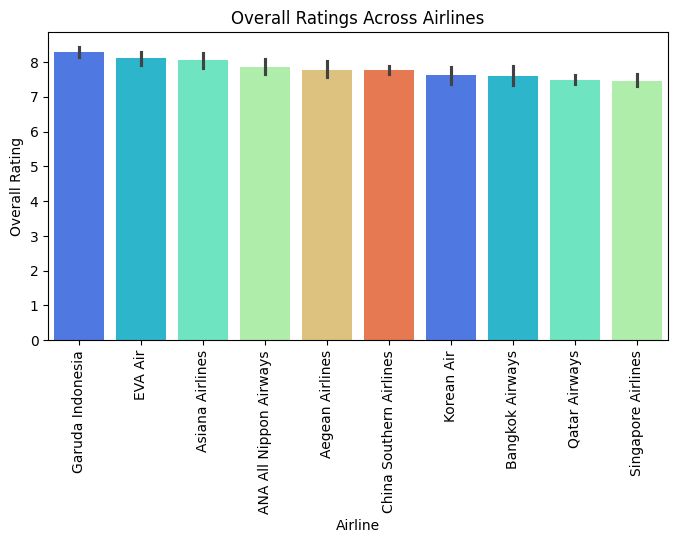

In [21]:
plt.figure(figsize=(8, 4))
sns.barplot(x='airline', y='overall', data=airline_df, order=top_airlines.index, palette=sns.color_palette('rainbow'))
plt.title('Overall Ratings Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer : I used barplot because barplot is easy to understand.

##### 2. What is/are the insight(s) found from the chart?

Answer : From the above chart we can see that top 10 airlines which have higher rating and the Garuda Indonesia airline is the top most airline which have highest rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : Yes, the above insight has positive impact on business. The airlines which have lower ratings they can follow the airlines which have higher ratings.

#### Chart - 2 : Which 'traveller_type' has the most reviews?

In [23]:
# find out traveller type which has the most review
traveller_type_counts = airline_df['traveller_type'].value_counts()
print(traveller_type_counts)

traveller_type
Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: count, dtype: int64


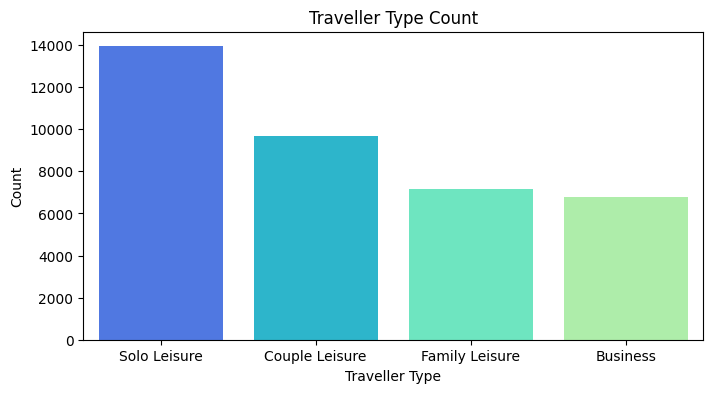

In [24]:
# visualize traveller type count using barplot
plt.figure(figsize=(8,4))
sns.barplot(x=traveller_type_counts.index, y=traveller_type_counts, palette=sns.color_palette('rainbow'))
plt.title('Traveller Type Count')
plt.xlabel('Traveller Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer : A bar plot is used because it effectively visualizes and compares the frequency or count of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Answer : According to above barplot we can see that solo leisure traveller type has highest ratings and the business traveller type has lowest ratings.

#### Chart - 3 : Which 'cabin' class has the most reviews?

In [25]:
# find out cabin class which has highest review
cabin_class_counts = airline_df['cabin'].value_counts()
print(cabin_class_counts)

cabin
Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: count, dtype: int64


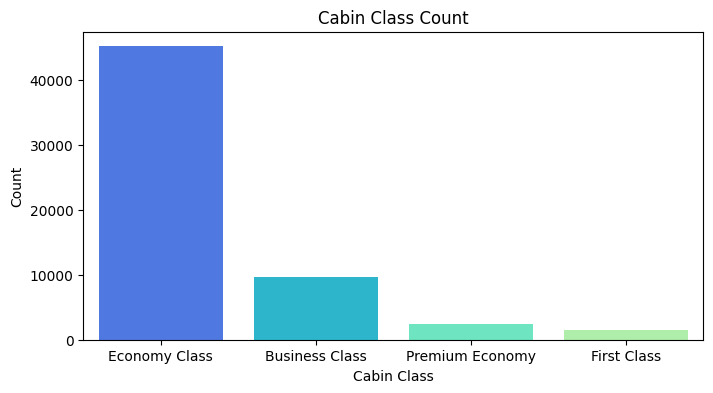

In [26]:
# visualize cabin class count
plt.figure(figsize=(8,4))
sns.barplot(x=cabin_class_counts.index, y=cabin_class_counts, palette=sns.color_palette('rainbow'))
plt.title('Cabin Class Count')
plt.xlabel('Cabin Class')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer : A bar plot is used because it effectively visualizes and compares the frequency or count of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Answer : From above chart we can see that economy class has the highest review count and first calss has the lowest count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : The insight that the economy class receives the most reviews suggests a positive business impact, as it reflects a high level of customer engagement and interest. However, if first-class reviews consistently indicate dissatisfaction, it could lead to negative growth by deterring potential customers and impacting revenue in that segment, necessitating prompt attention to address any identified issues.

#### Chart - 4 : Top 10 'author' who has written the most reviews?


In [27]:
# count the reviews by authe
author_reviews = airline_df['author'].value_counts().head(10)
print(author_reviews)

author
Anders Pedersen    93
Michel Perrin      89
Jonathan Rodden    81
T Eldem            56
John Curtain       52
Colin Pay          51
R Sanyal           50
Neil Jeram         48
Tercon Bojan       47
J Bacallado        46
Name: count, dtype: int64


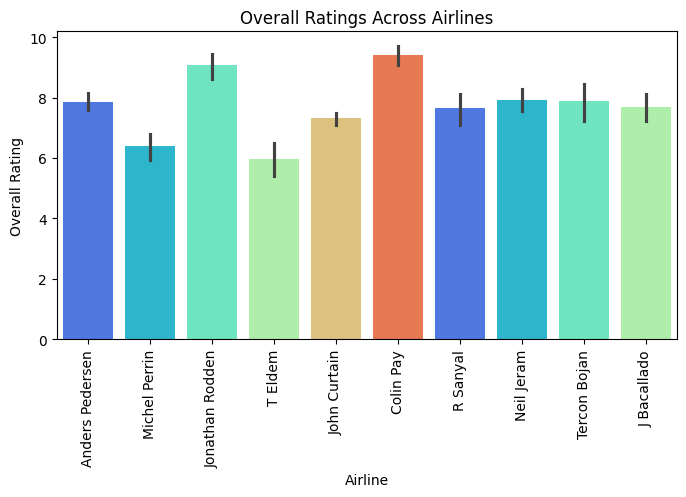

In [28]:
#visualize using bar plot
plt.figure(figsize=(8,4))
sns.barplot(x='author', y='overall', data=airline_df, order=author_reviews.index, palette=sns.color_palette('rainbow'))
plt.title('Overall Ratings Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer : A bar plot is used because it effectively visualizes and compares the frequency or count of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Answer : From above graph we can see the top 10 authors who has written most reviws and the Anders Pedersen is the top most author.

#### Chart - 5 : What is the proportion of positive (recommended) vs. negative (not recommended) reviews?


In [29]:
# Calculate the number of recommended and not recommended reviews
recommendation_counts = airline_df['recommended'].value_counts()

# Calculate proportions
proportions = recommendation_counts / recommendation_counts.sum()

recommendation_counts, proportions

(recommended
 no     31268
 yes    28493
 Name: count, dtype: int64,
 recommended
 no     0.523217
 yes    0.476783
 Name: count, dtype: float64)

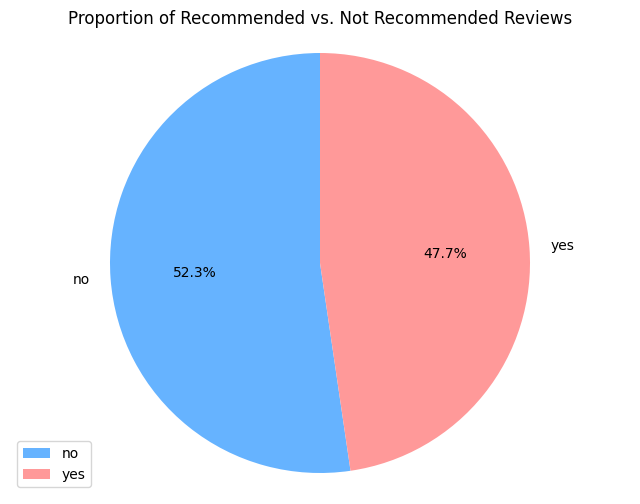

In [30]:
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proportion of Recommended vs. Not Recommended Reviews')
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Answer : A pie chart is used to visually represent the proportions of different categories within a whole, making it easy to compare the relative sizes of these categories at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer : From the above pie chart we can see thet there are 47.7 % reviws are positive and 52.3% reviwes are negative. we can see that the dataset is balanced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : The insights from the pie chart showing that 47.7% of reviews are positive and 52.3% are negative indicate that the majority of customer feedback is not favorable. This negative sentiment can hinder business growth by potentially deterring new customers and diminishing brand reputation. Addressing the issues highlighted in negative reviews could help improve customer satisfaction and drive positive business impact.

#### Chart - 6 : What are the top 10 most common routes in the dataset?


In [31]:
# # Calculate top 10 most common routes
top_routes = airline_df['route'].value_counts().head(10)
print(top_routes)

route
BKK to LHR               31
LHR to JFK               30
Vancouver to Toronto     28
LHR to BKK               27
Guangzhou to New York    26
Bangkok to Hong Kong     25
Singapore to Bangkok     24
London to Bangkok        23
Singapore to Sydney      23
Jakarta to Singapore     23
Name: count, dtype: int64


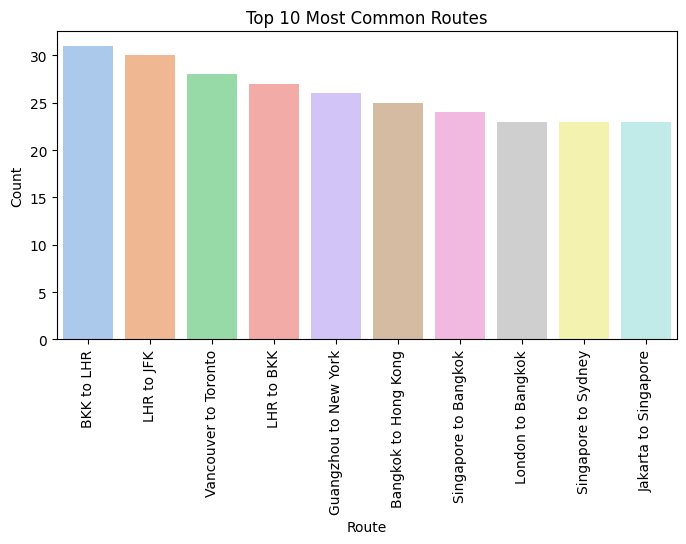

In [33]:
# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=top_routes.index, y=top_routes, palette=sns.color_palette('pastel'))
plt.title('Top 10 Most Common Routes')
plt.xlabel('Route')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer : I used barplot because bar plot is useful for visualization because it effectively compares the quantities of different categories, making it easy to see differences and trends across groups.

##### 2. What is/are the insight(s) found from the chart?

Answer : We can see that BKK to LHR is the most common route.

#### Chart - 7 : What is the distribution of 'food_bev' ratings?


In [34]:
# Calculate food_bev ratings
food_bev_ratings = airline_df['food_bev'].value_counts()
print(food_bev_ratings)

food_bev
1.0    13100
4.0    10466
5.0     9321
3.0     9015
2.0     6439
Name: count, dtype: int64


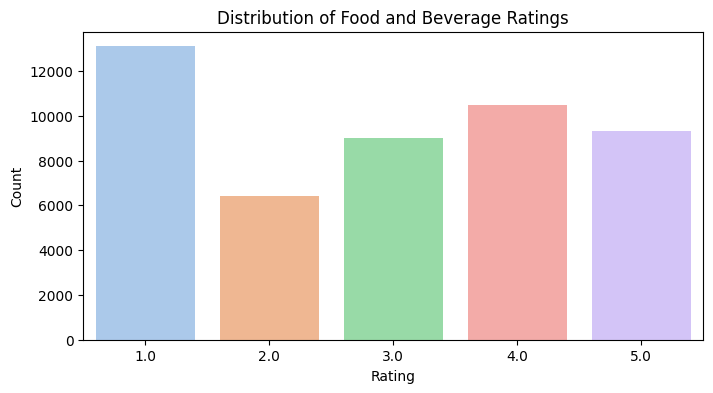

In [36]:
plt.figure(figsize=(8, 4))
sns.barplot(x=food_bev_ratings.index, y=food_bev_ratings, palette=sns.color_palette('pastel'))
plt.title('Distribution of Food and Beverage Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer : Histograms are useful because they provide a visual representation of the distribution of data. They allow us to quickly grasp the shape, center, and spread of a dataset, enabling insights into its underlying patterns and trends.

##### 2. What is/are the insight(s) found from the chart?

Answer : From above histplot we can see that 1 rating has maximum frequency followed by 4.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : Above insight will has negative impact on business. therefore airline company must have improve food_bev quality and distribution.

#### Chart - 8 : What is the most common 'ground_service' rating?


In [37]:
# calculate ground service rating
ground_service_ratings = airline_df['ground_service'].value_counts()
print(ground_service_ratings)

ground_service
1.0    15041
5.0     7641
4.0     6412
3.0     4619
2.0     3456
Name: count, dtype: int64


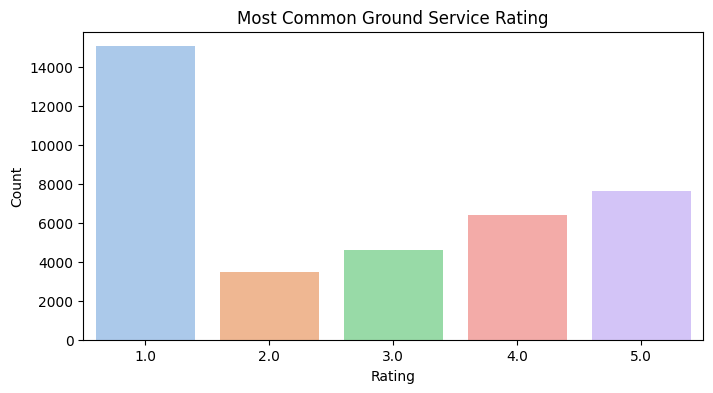

In [38]:
# create barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=ground_service_ratings.index, y=ground_service_ratings, palette=sns.color_palette('pastel'))
plt.title('Most Common Ground Service Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer : I used barplot because bar plot is useful for visualization because it effectively compares the quantities of different categories, making it easy to see differences and trends across groups.

##### 2. What is/are the insight(s) found from the chart?

Answer : From above plot we can see that 1 rating has highest rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : The insight that 1 rating has the highest frequency suggests potential issues with customer satisfaction or product quality, impacting business reputation and customer retention negatively. Identifying and addressing the root causes behind these low ratings could lead to significant improvements in customer experience and ultimately drive positive business impact.

#### Chart - 9 : What is the most common 'seat_comfort' rating?


In [39]:
# Calculate seat comfort rating
seat_comfort_ratings = airline_df['seat_comfort'].value_counts()
print(seat_comfort_ratings)

seat_comfort
1.0    13908
4.0    13485
3.0    11358
5.0     9834
2.0     7626
Name: count, dtype: int64


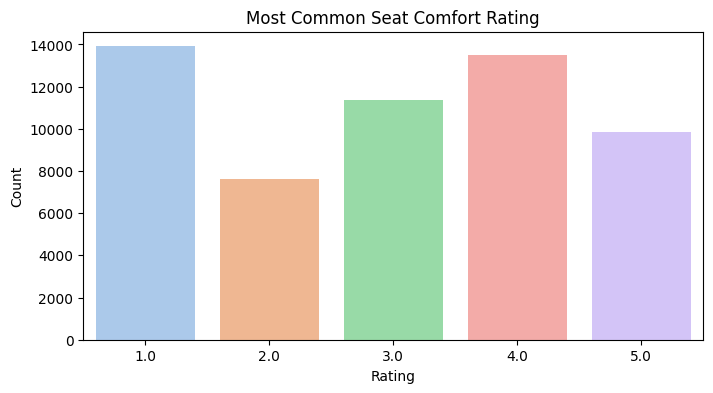

In [40]:
# Creat barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=seat_comfort_ratings.index, y=seat_comfort_ratings, palette=sns.color_palette('pastel'))
plt.title('Most Common Seat Comfort Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer : I used barplot because bar plot is useful for visualization because it effectively compares the quantities of different categories, making it easy to see differences and trends across groups.

##### 2. What is/are the insight(s) found from the chart?

Answer : The graph shows that the distribution of seat comfort ratings, with a 1 rating being the most common. This suggest dissatisfaction with seat confrort among a large portion of users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : This insight will has negative impact on the business. Therefore solution for that is to improve customer seat comfort. Resolve the issues take feedbacks from the customer and according to feedback do changes in services.

#### Chart - 10 : What is the most common 'value_for_money' rating?


In [41]:
# Calculate value for money rating
value_for_money_ratings = airline_df['value_for_money'].value_counts()
print(value_for_money_ratings)

value_for_money
1.0    18368
5.0    14350
4.0    12039
3.0     7651
2.0     6919
Name: count, dtype: int64


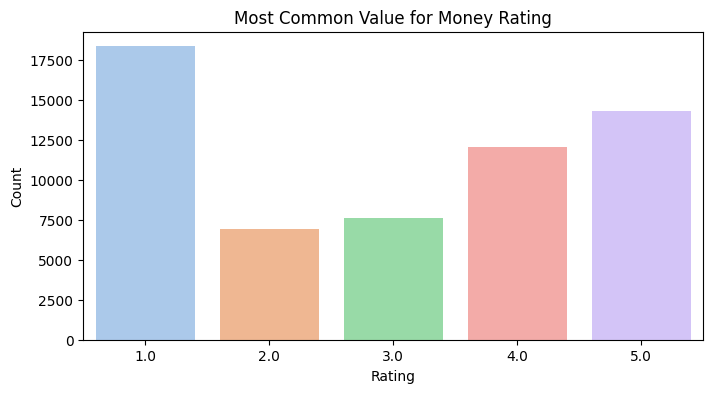

In [42]:
# Create barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=value_for_money_ratings.index, y=value_for_money_ratings, palette=sns.color_palette('pastel'))
plt.title('Most Common Value for Money Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer : Barplot is easy to understand.

##### 2. What is/are the insight(s) found from the chart?

Answer : The graph shows that the most common rating is 1

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : this insight will have negative impact. solution for that is to improve all tge services which have lower ratings.

#### Chart - 11 : Comparison of all independent variable/features?

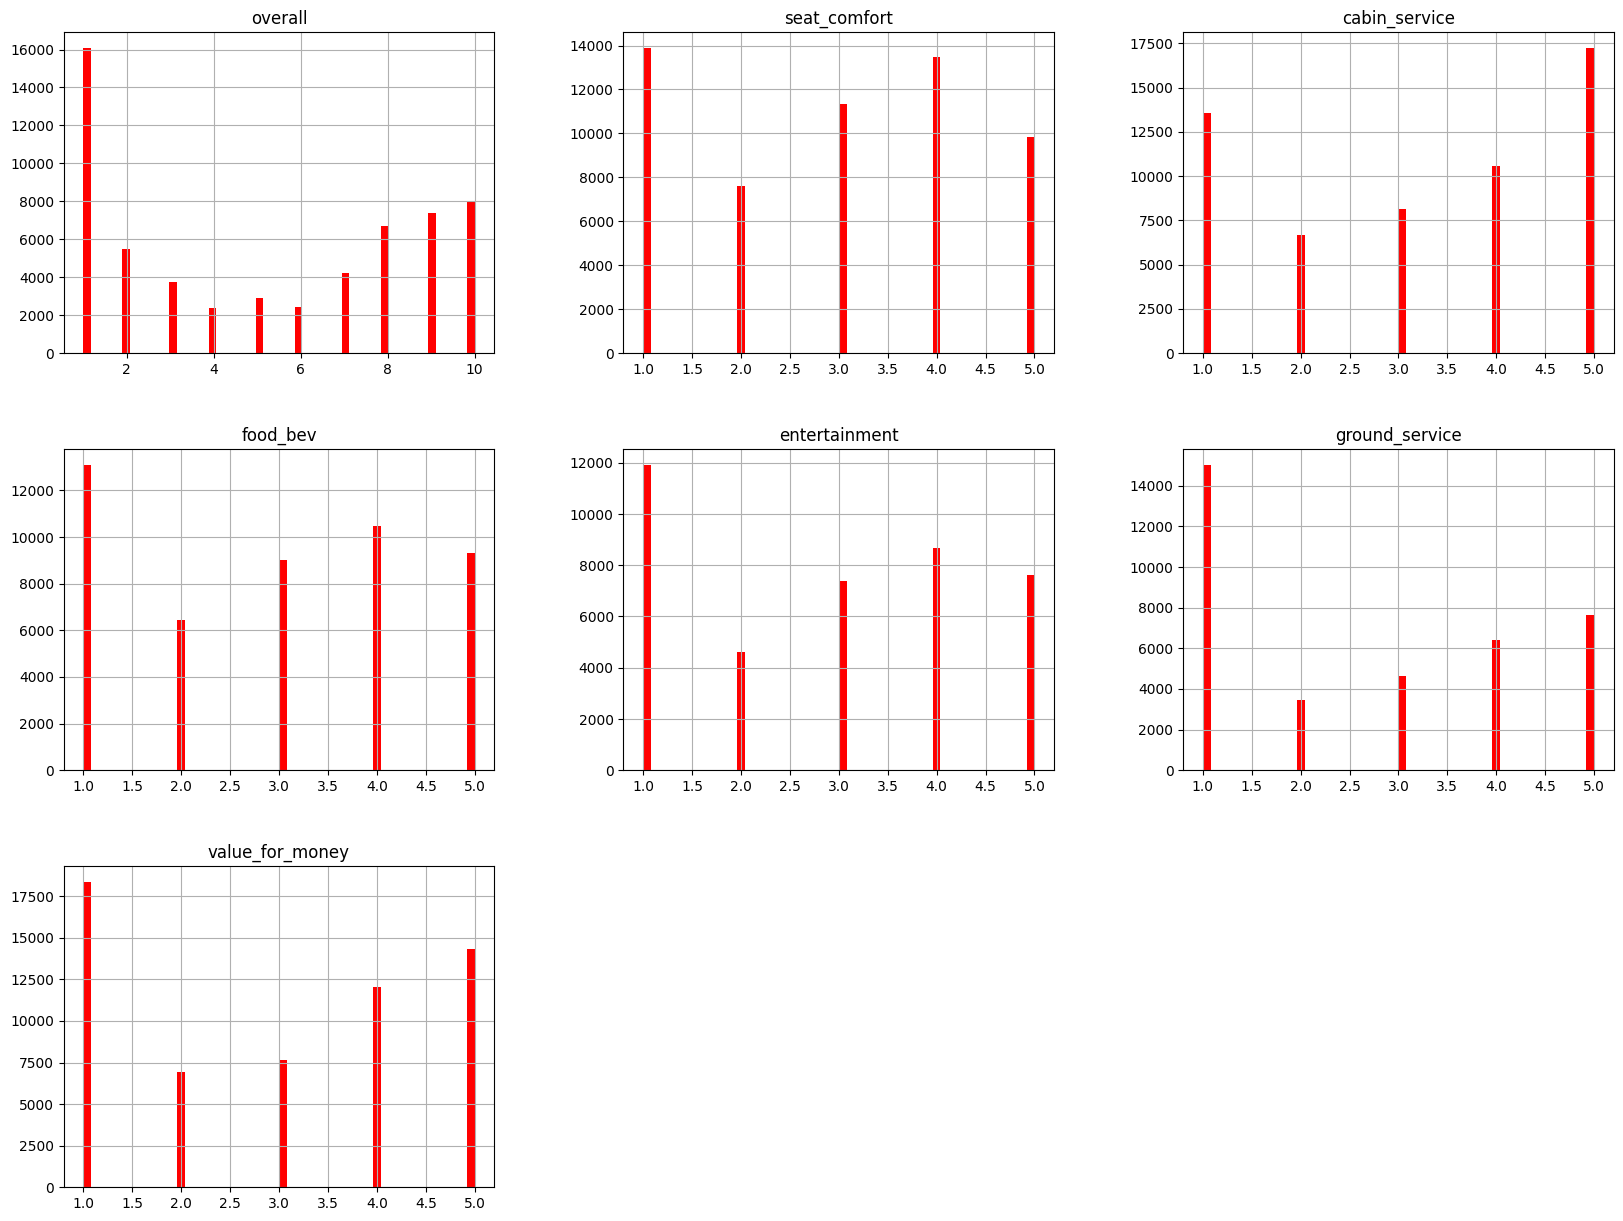

In [43]:
# compairing independent variable
airline_df.hist(bins=50, figsize=(20,15),color = 'red')
plt.show()

* The overall feature ratings of 1 to 2 occur more frequently. From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.

* From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

* The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

* The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

* From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

## **Dropping Unnecessary Columns**

In [44]:
#Checking Percentage wise missing values.
def missing_values_table(df):
        # Total missing values
        percent_mis_val = df.isnull().sum()*100/len(airline_df)
        missing_values_df = pd.DataFrame({'column_name': airline_df.columns,
                                     'percent_mis_val': percent_mis_val})
        return missing_values_df.sort_values('percent_mis_val',ascending=False)

In [45]:
missing_values_table(airline_df)

,column_name,percent_mis_val
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [46]:
# showing the unique aircraft names
airline_df['aircraft'].unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [47]:
# checking number of unique aircraft
airline_df['aircraft'].nunique()

2088

Drop aircraft column from the dataset

In [48]:
# dropping column
airline_df.drop('aircraft', axis=1, inplace=True)

In [49]:
airline_df = airline_df.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)

In [50]:
airline_df.columns

Index(['airline', 'overall', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended'],
      dtype='object')

Columns which must have drop from dataset:

1. **Author**: This categorical column has high variability and is not required for prediction.
2. **Route**: This column is not needed for building the model as it is independent of the services and quality of travel.
3. **Date_flown**: This column is not needed for building the model because it is not a time series data, and there are overlapping time periods between different dates.
4. **Review_date**: Similar to `Date_flown`, this column is not needed for the model.
5. **Customer_review**: This column is closely related to the overall review feature of the dataset and is therefore redundant.

Based on the percentage of null values, we divide our data into two parts:

- **high_null**: Columns with a high percentage of null values.
- **low_null**: Columns with a low percentage of null values.

In [51]:
# split the numeric column
high_null = ['overall','seat_comfort','cabin_service','value_for_money']
low_null = ['food_bev','entertainment','ground_service']

In [52]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [53]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(airline_df,col)

In [54]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [55]:
#Looping the null value column
for col in high_null:
  median_imputation(airline_df,col)

In [56]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,5.0,NaN,NaN,3.0,3.0,1.0,1.0,1.0,3.0,NaN


In [57]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)

In [58]:
airline_df['traveller_type'].fillna(airline_df['traveller_type'].mode()[0], inplace=True)

In [59]:
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0], inplace=True)

In [60]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


In [61]:
# check null values
missing_values_table(airline_df)

,column_name,percent_mis_val
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [62]:
airline_df.shape

(59761, 11)

## ***Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [63]:
# Handling Missing Values & Missing Value Imputation
missing_values_table(airline_df)

,column_name,percent_mis_val
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


### 2. Handling Outliers

In [64]:
# Handling Outliers & Outlier treatments
outlier_columns = list(set(airline_df.describe().columns) - {'recommended'})
outlier_columns

['food_bev',
 'overall',
 'value_for_money',
 'entertainment',
 'ground_service',
 'cabin_service',
 'seat_comfort']

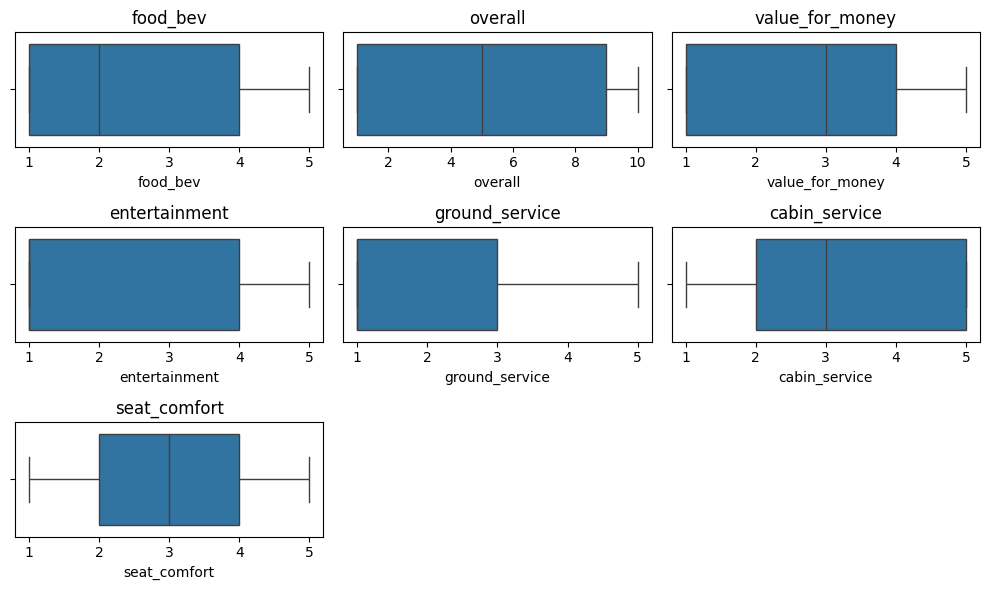

In [65]:
# Create boxplot
plt.figure(figsize=(10, 6))
for index, column in enumerate(outlier_columns):
    plt.subplot(3, 3, index+1)
    sns.boxplot(airline_df[column], orient='h')
    plt.title(column)
plt.tight_layout()
plt.show()

There is no any outliers in the dataset.

### 3. Categorical Encoding

In [66]:
# Encode your categorical columns
#converting targeted column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [67]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1


In [68]:
airline_df.columns

Index(['airline', 'overall', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended'],
      dtype='object')

In [69]:
# select only numeric columns
numeric_columns = airline_df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

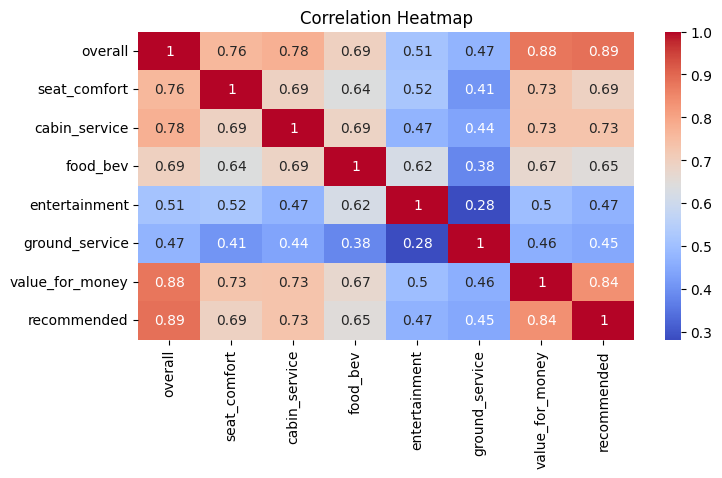

In [70]:
# plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(airline_df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the above heatmap we have following insights:

* Overall column is strongly correlated with the recommendation.
* Value for Money is highly correlated with recommendations (0.84), indicating that customers who perceive good value are more likely to recommend the service.
* Cabine services is positively correlated with recommendattion.
Seat confort shows a notable correlation with recommendation.
* food and Beverage is moderatly correlated with recommendation.
* entertainment and ground service is weakly correlated with recommendation.

# Check Multicollinearity

In [71]:
#Creating a function to remove multicollinear
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [72]:
calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,11.315958
1,cabin_service,12.326269
2,food_bev,9.516571
3,entertainment,5.394806
4,ground_service,3.556587


In [73]:
#drop overall column
airline_df.drop(["overall"], axis = 1, inplace = True)

In [74]:
airline_df.drop(["airline"], axis = 1, inplace = True)

Airline column dropped because that column does not have any use further.

# Define dependent and independent variables

In [75]:
# dependent and independent variables
X = airline_df.drop('recommended', axis=1)
y = airline_df['recommended']

In [76]:
X.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0


In [77]:
y.head()

,recommended
1,1
3,0
5,0
7,1
9,0


# One hot encoding

In [78]:
X = pd.get_dummies(X, drop_first=True)

In [79]:
X.head()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,False,False,False,True,False,False
3,4.0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False
5,1.0,4.0,1.0,3.0,1.0,2.0,False,False,False,True,False,False
7,4.0,5.0,5.0,5.0,5.0,5.0,False,False,True,True,False,False
9,1.0,1.0,1.0,1.0,1.0,1.0,False,False,True,True,False,False


In [80]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))

The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


# Data Splitting

In [81]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47808, 12)
(11953, 12)
(47808,)
(11953,)


## ***ML Model Implementation***

In this project I am going to implement following algorithms:
1. Logistic Regression
2. Decision Tree
3. Random Forest Regression
4. SVM
5. KNN
6. Naive Bayes Classifier


### ML Model - 1 : Logistic Regression

In [83]:
# Initiate logistic regression
log_reg = LogisticRegression()

In [84]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [85]:
y_pred_log = log_reg.predict(X_test)
print(y_pred_log)

[0 0 1 ... 1 1 1]


In [86]:
# logistic regression report
report_log_reg = classification_report(y_test,y_pred_log)
print(report_log_reg)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



In [87]:
# confusion matrix
confusion_matrix_log = confusion_matrix(y_test,y_pred_log)
print(confusion_matrix_log)

[[5755  470]
 [ 358 5370]]


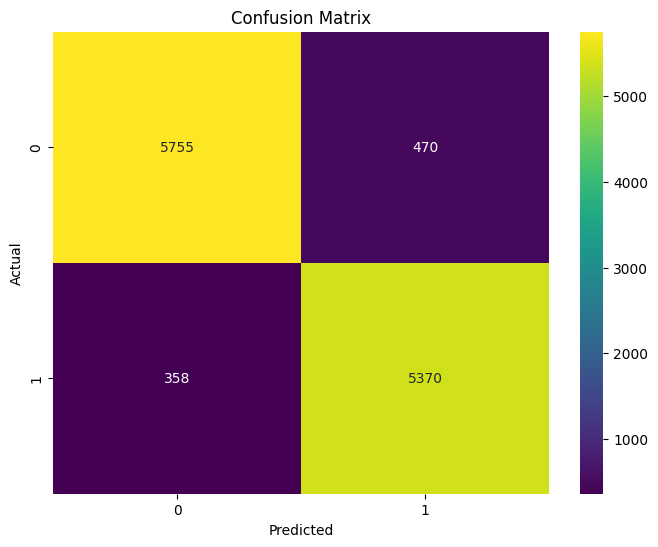

In [88]:
# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_log, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-Validation

In [89]:
logistic = LogisticRegression()

In [90]:
scores = cross_val_score(logistic, X, y, cv=5)
print(scores)

[0.92746591 0.93340027 0.92879853 0.93917336 0.95289491]


In [91]:
scores = pd.Series(scores)
print(scores.mean(), scores.std(), scores.min(), scores.max())

0.9363465952826615 0.010324221476635517 0.9274659081402159 0.9528949129852744


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here I used logistic regression. This ML model is used for binary classification where we use sigmoid function, that takes input as independent variable and produces a probablity value between 0 and 1.

we can see that accuracy score of this model is 93%.

### ML Model - 2 : Decision Tree

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
# Initiate decision tree model
tree_model = DecisionTreeClassifier()

In [93]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
y_pred_tree = tree_model.predict(X_test)
print(y_pred_tree)

[0 0 1 ... 1 1 1]


In [95]:
# accuracy
accuracy_score_dt = accuracy_score(y_test,y_pred_tree)
print(accuracy_score_dt)

0.9124905881368695


In [96]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6225
           1       0.91      0.90      0.91      5728

    accuracy                           0.91     11953
   macro avg       0.91      0.91      0.91     11953
weighted avg       0.91      0.91      0.91     11953



#### 2. Cross- Validation & Hyperparameter Tuning

In [97]:
# setting the parameters and scoring metric
parameter= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

In [98]:
#prforming hyperparameter tuning using gridsearchch

# setting an estimator and crossvalidation
grid_search = GridSearchCV(estimator=tree_model, param_grid=parameter, scoring=scoring, cv=5,refit='accuracy')

In [99]:
# fitting x and y to gridsearchcv model using DT classifier
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             refit='accuracy',
             scoring=['accuracy', 'precision_weighted', 'recall_weighted',
                      'f1_weighted'])

In [100]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [101]:
accuracy_score_dt = grid_search.best_score_
print(accuracy_score_dt)

0.9314759021219793


##### Which hyperparameter optimization technique have you used?

Answer : I used gridsearchcv optimization technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer : after hypertunning score of matrics increased which is 93% now.

### ML Model - 3 : Fitting Random forest

In [102]:
# Initiate random forest model
rf_model = RandomForestClassifier()

In [103]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
y_pred_rf = rf_model.predict(X_test)
print(y_pred_rf)

[0 0 1 ... 1 1 1]


In [105]:
accuracy_score_random_forest = accuracy_score(y_test,y_pred_rf)
print(accuracy_score_random_forest)

0.9262946540617418


In [106]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6225
           1       0.92      0.92      0.92      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

Accuracy score is 92%.

#### 2. Cross- Validation & Hyperparameter Tuning

In [107]:
parameter= {'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,3,4,],'min_samples_leaf':[1,2,3]}

In [108]:
rf_model_grid = GridSearchCV(estimator=rf_model, param_grid=parameter, scoring=scoring, cv=5,refit='accuracy',verbose=3)

In [109]:
rf_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.904) f1_weighted: (test=0.904) precision_weighted: (test=0.907) recall_weighted: (test=0.904) total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.900) f1_weighted: (test=0.899) precision_weighted: (test=0.903) recall_weighted: (test=0.900) total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.905) f1_weighted: (test=0.905) precision_weighted: (test=0.909) recall_weighted: (test=0.905) total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.898) f1_weighted: (test=0.897) precision_weighted: (test=0.900) recall_weighted: (test=0.898) total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             refit='accuracy',
             scoring=['accuracy', 'precision_weighted', 'recall_weighted',
                      'f1_weighted'],
             verbose=3)

In [110]:
rf_model_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [111]:
accuracy_score_rf = rf_model_grid.best_score_
print(accuracy_score_rf)

0.9344042232505201


After the hypertunning score is now 93%.

### ML Model - 4 : K-Nearest Neighbour

In [112]:
# Initializing KNN model
knn_model = KNeighborsClassifier()

In [113]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [114]:
# predict
y_pred_knn = knn_model.predict(X_test)
print(y_pred_knn)

[0 0 1 ... 1 1 1]


In [115]:
knn_model.score(X_train,y_train)

0.9474774096385542

In [116]:
accuracy_score_knn = knn_model.score(X_test,y_test)
print(accuracy_score_knn)

0.928971806241111


In [117]:
# confusion matrix of knn
confusion_matrix(y_test,y_pred_knn)

array([[5787,  438],
       [ 411, 5317]])

In [118]:
# area under roc curve
roc_auc_score(y_test,y_pred_knn)

0.9289428804603891

Here we get 92% score.

### ML Model - 5 : Support Vector Machine

In [119]:
# Initialize SVM model
svm_model = SVC(kernel='linear')

In [120]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [121]:
y_pred_svm = svm_model.predict(X_test)
print(y_pred_svm)

[0 0 1 ... 1 1 1]


In [122]:
accuracy_score_train_svm = svm_model.score(X_train,y_train)
print(accuracy_score_train_svm)

0.9370398259705489


In [123]:
accuracy_score_test_svm = svm_model.score(X_test,y_test)
print(accuracy_score_test_svm)

0.929557433280348


In [124]:
# confusion metrix
confusion_matrix(y_test,y_pred_svm)

array([[5734,  491],
       [ 351, 5377]])

Here we get 92% accuracy score.

### ML Model - 6 : Naive Bayes Classifier

In [125]:
# Initialize Naive Bayes Classifier
nb_model = GaussianNB()

In [126]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [127]:
accuracy_score_train_nb = nb_model.score(X_train,y_train)
print(accuracy_score_train_nb)

0.9116884203480589


In [128]:
accoracy_score_test_nb = nb_model.score(X_test, y_test)
print(accoracy_score_test_nb)

0.9066343177444993


In [129]:
y_pred_nb = nb_model.predict(X_test)
print(y_pred_nb)

[0 0 1 ... 1 1 0]


In [130]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_nb)*100)

Gaussian Naive Bayes model accuracy(in %): 90.66343177444993


Here accuracy score is 90%.

# **Accuracy Matrics of All Models**

In [131]:
models=[log_reg,tree_model,rf_model,knn_model,svm_model,nb_model]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbor','support vector','naive bayes']

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def accuracy_of_each_model(model, X_train, y_train, X_test, y_test):
    # Predicting on train data
    y_train_preds = model.predict(X_train)
    # Predicting on test data
    y_test_preds = model.predict(X_test)

    # Storing all training scores
    train_scores = []
    # Storing all test scores
    test_scores = []
    metrics = ['Accuracy_Score', 'Precision_Score', 'Recall_Score', 'Roc_Auc_Score']

    # Get the accuracy scores
    train_accuracy_score = accuracy_score(y_train, y_train_preds)
    test_accuracy_score = accuracy_score(y_test, y_test_preds)

    train_scores.append(train_accuracy_score)
    test_scores.append(test_accuracy_score)

    # Get the precision scores
    train_precision_score = precision_score(y_train, y_train_preds, average='weighted')
    test_precision_score = precision_score(y_test, y_test_preds, average='weighted')

    train_scores.append(train_precision_score)
    test_scores.append(test_precision_score)

    # Get the recall scores
    train_recall_score = recall_score(y_train, y_train_preds, average='weighted')
    test_recall_score = recall_score(y_test, y_test_preds, average='weighted')

    train_scores.append(train_recall_score)
    test_scores.append(test_recall_score)

    # Get the roc_auc scores
    train_roc_auc_score = roc_auc_score(y_train, y_train_preds, average='weighted', multi_class='ovr')
    test_roc_auc_score = roc_auc_score(y_test, y_test_preds, average='weighted', multi_class='ovr')

    train_scores.append(train_roc_auc_score)
    test_scores.append(test_roc_auc_score)

    return train_scores, test_scores, metrics


In [133]:
import pandas as pd

# Assuming models and name are predefined lists
for model_ in range(len(models)):
    # Fit the model
    models[model_].fit(X_train, y_train)

    # Calculate train and test scores and metrics
    train_score_, test_score_, metrics_ = accuracy_of_each_model(models[model_], X_train, y_train, X_test, y_test)

    # Print the results
    print("-*-*-"*3 + f"{name[model_]}" + "-*-*-"*4)
    print("")
    print(pd.DataFrame(data={'Metrics': metrics_, 'Train_Score': train_score_, 'Test_Score': test_score_}))
    print("")


-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

           Metrics  Train_Score  Test_Score
0   Accuracy_Score     0.938148    0.930729
1  Precision_Score     0.938284    0.930934
2     Recall_Score     0.938148    0.930729
3    Roc_Auc_Score     0.938354    0.930999

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

           Metrics  Train_Score  Test_Score
0   Accuracy_Score     0.970382    0.912825
1  Precision_Score     0.970447    0.912822
2     Recall_Score     0.970382    0.912825
3    Roc_Auc_Score     0.969994    0.912514

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

           Metrics  Train_Score  Test_Score
0   Accuracy_Score     0.970361    0.926462
1  Precision_Score     0.970371    0.926457
2     Recall_Score     0.970361    0.926462
3    Roc_Auc_Score     0.970374    0.926275

-*-*--*-*--*-*-k_neighbor-*-*--*-*--*-*--*-*-

           Metrics  Train_Score  Test_Score
0   Accuracy_Sco

# **Conclusion**

Based on ML Model Implementation:

* The Logistic Regression model performs well with consistent metrics across accuracy, precision, recall, and ROC AUC. It shows strong performance on the test data.
* The Decision Tree model after hyperparameter tuning shows slightly lower performance compared to the Logistic Regression model. It has good accuracy and recall but slightly lower ROC AUC.
* The Random Forest model after hyperparameter tuning performs better than the Decision Tree model but slightly worse than the Logistic Regression model. It has strong overall metrics with good precision and recall.
* The k-NN model performs well, with metrics comparable to the Logistic Regression model. It shows strong accuracy, precision, recall, and ROC AUC scores.
* The SVM model also performs well, with metrics very close to those of the Logistic Regression and k-NN models. It has strong precision and ROC AUC scores.
* The Naive Bayes model shows the lowest performance among all the models, with lower accuracy, precision, recall, and ROC AUC scores.
* Based on the metrics, the Logistic Regression Model can be considered the best model for this particular dataset, closely followed by the k-Nearest Neighbors (k-NN) and Support Vector Machine (SVM) models. These models exhibit strong and consistent performance across all evaluated metrics.

EDA:

* The Garuda Indonesia airline is the top most airline which have highest rating.
* The solo leisure traveller type has highest ratings and the business traveller type has lowest ratings.
* economy class has the highest review count and first calss has the lowest count.
* The Anders Pedersen is the top most author who has written highest review.
* Dataset has 47.7 % positive reviews and 52.3% negative reviwes.
* BKK to LHR is the most common route.
* food_bev has maximum 1 rating.
* ground_serivce also has maximum 1 rating.
* seat comfert rating is also has maximum 1 rating.
* value for money has maximum 1 rating.


Suggestions:

* Airlines must focuse on improving those services which has maximum 1 rating. Take feedback from passangers, do changes according to feedbacks and focus on the weak areas.

Challenges during project:

* checking and removing multicollinearity.
* handelling missing values.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***